In [1]:
%matplotlib inline

1 / 196
2 / 196
3 / 196
4 / 196
5 / 196
6 / 196
7 / 196
8 / 196
9 / 196
10 / 196
11 / 196
12 / 196
13 / 196
14 / 196
15 / 196
16 / 196
17 / 196
18 / 196
19 / 196
20 / 196
21 / 196
22 / 196
23 / 196
24 / 196
25 / 196
26 / 196
27 / 196
28 / 196
29 / 196
30 / 196
31 / 196
32 / 196
33 / 196
34 / 196
35 / 196
36 / 196
37 / 196
38 / 196
39 / 196
40 / 196
41 / 196
42 / 196
43 / 196
44 / 196
45 / 196
46 / 196
47 / 196
48 / 196
49 / 196
50 / 196
51 / 196
52 / 196
53 / 196
54 / 196
55 / 196
56 / 196
57 / 196
58 / 196
59 / 196
60 / 196
61 / 196
62 / 196
63 / 196
64 / 196
65 / 196
66 / 196
67 / 196
68 / 196
69 / 196
70 / 196
71 / 196
72 / 196
73 / 196
74 / 196
75 / 196
76 / 196
77 / 196
78 / 196
79 / 196
80 / 196
81 / 196
82 / 196
83 / 196
84 / 196
85 / 196
86 / 196
87 / 196
88 / 196
89 / 196
90 / 196
91 / 196
92 / 196
93 / 196
94 / 196
95 / 196
96 / 196
97 / 196
98 / 196
99 / 196
100 / 196
101 / 196
102 / 196
103 / 196
104 / 196
105 / 196
106 / 196
107 / 196
108 / 196
109 / 196
110 / 196
111 / 19

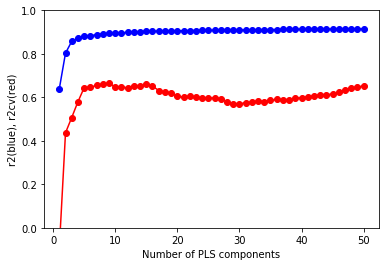

r2: 0.893912243975937
RMSE: 0.6551009599112884
MAE: 0.5015939356881854


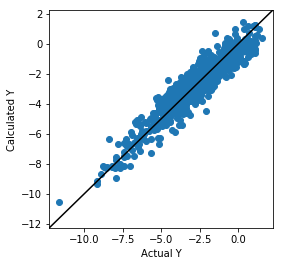

r2p: -0.01810857410266875
RMSEp: 2.0926961244825204
MAEp: 0.6596700866216926


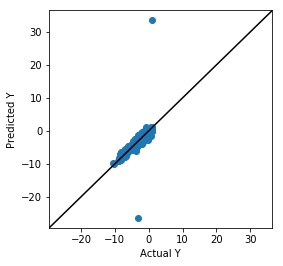

In [2]:
# -*- coding: utf-8 -*-
"""
@author: Hiromasa Kaneko
課題14: logSdataset1290.csvを読み込み、1番目から878番目までのサンプルをトレーニングデータ(モデル構築用データ)とし、
残りをテストデータ(モデル検証用データ)として、PLSモデルの作成およびモデルを用いた予測を行え。
クロスバリデーションは5-fold クロスバリデーションとし、最適成分数は50成分まででr2CVが最大のものとする。
また説明変数も目的変数もオートスケーリングを行うこと。さらに、トレーニングデータとテストデータそれぞれにおいて、
実測値と計算値もしくは予測値との間でr2, RMSE(Root-Mean-Square Error), MEA(Mean Absolute Error)を計算し、
実測値と計算値もしくは予測値とのプロットを作成せよ。
"""

import matplotlib.figure as figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression

regression_method_flag = 3  # 1:OLS, 2:PLS(constant component number), 3:PLS,
pls_component_number = 2
max_pls_component_number = 50
fold_number = 2
threshold_of_rate_of_same_value = 0.79
do_autoscaling = True  # True or False
number_of_training_data = 878  # if this is the number of all samples, there are no test samples.

# load data set
raw_data_with_y = pd.read_csv('logSdataset1290.csv', encoding='SHIFT-JIS', index_col=0)
# raw_data_with_y = raw_data_with_y.drop(['Ipc','Kappa3'],axis=1) #Ipc:1139だけ外れ値をもつ記述子、
# Kappa3:889だけ外れ値をもつ記述子

# delete duplicates
# raw_data_with_y = raw_data_with_y.drop( raw_data_with_y.index[raw_data_with_y.index.duplicated()] )
# #重複したサンプルの最初を残す

# raw_data_with_y = raw_data_with_y.drop( raw_data_with_y.index[raw_data_with_y.index.duplicated(keep=False)] )
# #重複したサンプルはすべて削除

ytrain = raw_data_with_y.iloc[:number_of_training_data, 0]
raw_Xtrain = raw_data_with_y.iloc[:number_of_training_data, 1:]
ytest = raw_data_with_y.iloc[number_of_training_data:, 0]
raw_Xtest = raw_data_with_y.iloc[number_of_training_data:, 1:]

# y = raw_data_with_y[raw_data_with_y.columns[0]]
# rawX = raw_data_with_y[raw_data_with_y.columns[1:]]
# rawX_tmp = rawX.copy()

# delete descriptors with high rate of the same values
rate_of_same_value = list()
num = 0
for X_variable_name in raw_Xtrain.columns:
    num += 1
    print('{0} / {1}'.format(num, raw_Xtrain.shape[1]))
    same_value_number = raw_Xtrain[X_variable_name].value_counts()
    rate_of_same_value.append(float(same_value_number[same_value_number.index[0]] / raw_Xtrain.shape[0]))
deleting_variable_numbers = np.where(np.array(rate_of_same_value) >= threshold_of_rate_of_same_value)

"""
# delete descriptors with zero variance
deleting_variable_numbers = np.where( raw_Xtrain.var() == 0 )
"""

if len(deleting_variable_numbers[0]) == 0:
    Xtrain = raw_Xtrain.copy()
    Xtest = raw_Xtest.copy()
else:
    Xtrain = raw_Xtrain.drop(raw_Xtrain.columns[deleting_variable_numbers], axis=1)
    Xtest = raw_Xtest.drop(raw_Xtest.columns[deleting_variable_numbers], axis=1)
    print('Variable numbers zero variance: {0}'.format(deleting_variable_numbers[0] + 1))

print('# of X-variables: {0}'.format(Xtrain.shape[1]))

# autoscaling
if do_autoscaling:
    autoscaled_Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0, ddof=1)
    autoscaled_ytrain = (ytrain - ytrain.mean()) / ytrain.std(ddof=1)
    autoscaled_Xtest = (Xtest - Xtrain.mean(axis=0)) / Xtrain.std(axis=0, ddof=1)
else:
    autoscaled_Xtrain = Xtrain.copy()
    autoscaled_ytrain = ytrain.copy()
    autoscaled_Xtest = Xtest.copy()

if regression_method_flag == 1:  # Ordinary Least Squares
    regression_model = LinearRegression()
elif regression_method_flag == 2:  # Partial Least Squares with constant component
    regression_model = PLSRegression(n_components=pls_component_number)
elif regression_method_flag == 3:  # Partial Least Squares
    pls_components = np.arange(1, min(np.linalg.matrix_rank(autoscaled_Xtrain) + 1, max_pls_component_number + 1), 1)
    r2all = list()
    r2cvall = list()
    for pls_component in pls_components:
        pls_model_in_cv = PLSRegression(n_components=pls_component)
        pls_model_in_cv.fit(autoscaled_Xtrain, autoscaled_ytrain)
        calculated_y_in_cv = np.ndarray.flatten(pls_model_in_cv.predict(autoscaled_Xtrain))
        estimated_y_in_cv = np.ndarray.flatten(
            model_selection.cross_val_predict(pls_model_in_cv, autoscaled_Xtrain, autoscaled_ytrain, cv=fold_number))
        if do_autoscaling:
            calculated_y_in_cv = calculated_y_in_cv * ytrain.std(ddof=1) + ytrain.mean()
            estimated_y_in_cv = estimated_y_in_cv * ytrain.std(ddof=1) + ytrain.mean()

        r2all.append(float(1 - sum((ytrain - calculated_y_in_cv) ** 2) / sum((ytrain - ytrain.mean()) ** 2)))
        r2cvall.append(float(1 - sum((ytrain - estimated_y_in_cv) ** 2) / sum((ytrain - ytrain.mean()) ** 2)))
    plt.plot(pls_components, r2all, 'bo-')
    plt.plot(pls_components, r2cvall, 'ro-')
    plt.ylim(0, 1)
    plt.xlabel('Number of PLS components')
    plt.ylabel('r2(blue), r2cv(red)')
    plt.show()
    optimal_pls_component_number = np.where(r2cvall == np.max(r2cvall))
    optimal_pls_component_number = optimal_pls_component_number[0][0] + 1
    regression_model = PLSRegression(n_components=optimal_pls_component_number)

regression_model.fit(autoscaled_Xtrain, autoscaled_ytrain)

# calculate y
calculated_ytrain = np.ndarray.flatten(regression_model.predict(autoscaled_Xtrain))
if do_autoscaling:
    calculated_ytrain = calculated_ytrain * ytrain.std(ddof=1) + ytrain.mean()
# r2, RMSE, MAE
print('r2: {0}'.format(float(1 - sum((ytrain - calculated_ytrain) ** 2) / sum((ytrain - ytrain.mean()) ** 2))))
print('RMSE: {0}'.format(float((sum((ytrain - calculated_ytrain) ** 2) / len(ytrain)) ** 0.5)))
print('MAE: {0}'.format(float(sum(abs(ytrain - calculated_ytrain)) / len(ytrain))))
# yy-plot
plt.figure(figsize=figure.figaspect(1))
plt.scatter(ytrain, calculated_ytrain)
YMax = np.max(np.array([np.array(ytrain), calculated_ytrain]))
YMin = np.min(np.array([np.array(ytrain), calculated_ytrain]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')
plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Calculated Y')
plt.show()

# standard regression coefficients
standard_regression_coefficients = regression_model.coef_
standard_regression_coefficients = pd.DataFrame(standard_regression_coefficients)
standard_regression_coefficients.index = Xtrain.columns
standard_regression_coefficients.columns = ['standard regression coefficient']
standard_regression_coefficients.to_csv('standard_regression_coefficients.csv')

# prediction
predicted_ytest = np.ndarray.flatten(regression_model.predict(autoscaled_Xtest))
if do_autoscaling:
    predicted_ytest = predicted_ytest * ytrain.std(ddof=1) + ytrain.mean()
# r2p, RMSEp, MAEp
print('r2p: {0}'.format(float(1 - sum((ytest - predicted_ytest) ** 2) / sum((ytest - ytest.mean()) ** 2))))
print('RMSEp: {0}'.format(float((sum((ytest - predicted_ytest) ** 2) / len(ytest)) ** 0.5)))
print('MAEp: {0}'.format(float(sum(abs(ytest - predicted_ytest)) / len(ytest))))
# yy-plot
plt.figure(figsize=figure.figaspect(1))
plt.scatter(ytest, predicted_ytest)
YMax = np.max(np.array([np.array(ytest), predicted_ytest]))
YMin = np.min(np.array([np.array(ytest), predicted_ytest]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')
plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()
